# Graphs

Creating graphs based on results

In [1]:
# The results file contains extra information during loading
# Remove loading info and clean table
# Returns: table of results (type: list of lines)
def getTableFromFile(filepath): 
    lines = []
    flag = False
    with open(filepath) as f:
        for line in f:
            if "Type" in line:
                flag = True
            if flag is True:
                cleanedLine = line.strip('\n')
                cleanedLine = cleanedLine.replace("F1 Score", "F1_Score")
                cleanedLine = cleanedLine.replace("Time in ms", "Time_in_ms")
                cleanedLine = cleanedLine.replace("%", "")

                lines.append(cleanedLine)
                
        return lines


In [2]:
table = getTableFromFile("../results/s1_s4_no_vol_rand_1k_round_2.txt")

In [3]:
table

['Type                Name                                    Accuracy       F1_Score       Time_in_ms',
 'dictionary_based    ContractableBOSS                        99.00         99.00         362270.58',
 'dictionary_based    IndividualBOSS                          87.50         87.38         5594.03',
 'distance_based      KNeighborsTimeSeriesClassifier          93.50         93.47         1291.00',
 'interval_based      TimeSeriesForestClassifier              98.00         98.02         2464.00',
 'shapelet_based      ShapeletTransformClassifier             98.90         98.90         806504.59']

In [4]:
import pandas as pd

# Given the table
# Create a pandas dataframe where the first entry is the names of the columns
# subsequent entries are rows in the dataframe 
def getDataframeFromTable(table):
    rows = []
    for row in table:
        rows.append(row.split())
    df = pd.DataFrame(columns=rows[0], data=rows[1:])

    # Convert the following cols to float and round to 2 decimal places
    pd.options.display.float_format = "{:,.2f}".format
    cols = ['Accuracy', 'F1_Score', 'Time_in_ms']
    for col in cols: 
        if col in df.columns:
            df[col] = df[col].astype(float)

    return df
    

In [5]:
resultsToDf = getDataframeFromTable(table)

In [6]:
resultsToDf

,Type,Name,Accuracy,F1_Score,Time_in_ms
0,dictionary_based,ContractableBOSS,99.00,99.00,"362,270.58"
1,dictionary_based,IndividualBOSS,87.50,87.38,"5,594.03"
2,distance_based,KNeighborsTimeSeriesClassifier,93.50,93.47,"1,291.00"
3,interval_based,TimeSeriesForestClassifier,98.00,98.02,"2,464.00"
4,shapelet_based,ShapeletTransformClassifier,98.90,98.90,"806,504.59"


# Save Tables to CSV

In [7]:
    import os  

file_names = ["s1_s2_no_vol_10_runs","s1_s4_no_vol_rand_1k_round_2", "s1_s4_vol_rand_1k"]

for file_name in file_names: 
        df = getDataframeFromTable(getTableFromFile("../results/"+file_name+".txt"))
        df.to_csv(f'../results/csv/{file_name}.csv', float_format='%.2f', index = False)
        

# Graph Results

In [8]:
import matplotlib.pyplot as plt

# Helper function to graph dataframes
# Given a df which contains columns: Accuracy, F1_Score, Time_in_ms
# Graph the results such that 3 subplots are on top of each other
def createGraphs(df, title):
    fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15,10))
    fig.suptitle(title, fontsize=16)

    ax = df.plot(x="Name", y="Accuracy", kind='bar', ax=axes[0], rot=0)
    ax.bar_label(ax.containers[0], fmt="%.2f")
    ax.set_ylim(ymin=50)
    ax.get_legend().remove()
    ax.set_ylabel("Accuracy (%)")
    ax.get_xaxis().get_label().set_visible(False)

    ax = df.plot(x="Name", y="F1_Score", kind='bar', ax=axes[1], rot=0)
    ax.bar_label(ax.containers[0], fmt="%.2f")
    ax.set_ylim(ymin=50)
    ax.get_legend().remove()
    ax.set_ylabel("F1 Score (%)")
    ax.get_xaxis().get_label().set_visible(False)

    plt.tight_layout()
    ax = df.plot(x="Name", y="Time_in_ms", kind='bar', ax=axes[2], rot=0)
    ax.bar_label(ax.containers[0])
    ax.get_legend().remove()
    ax.set_ylabel("Time (ms)")
    ax.get_xaxis().get_label().set_visible(False)

    plt.tight_layout()
    plt.margins(y=0.1)

# Graph All Results

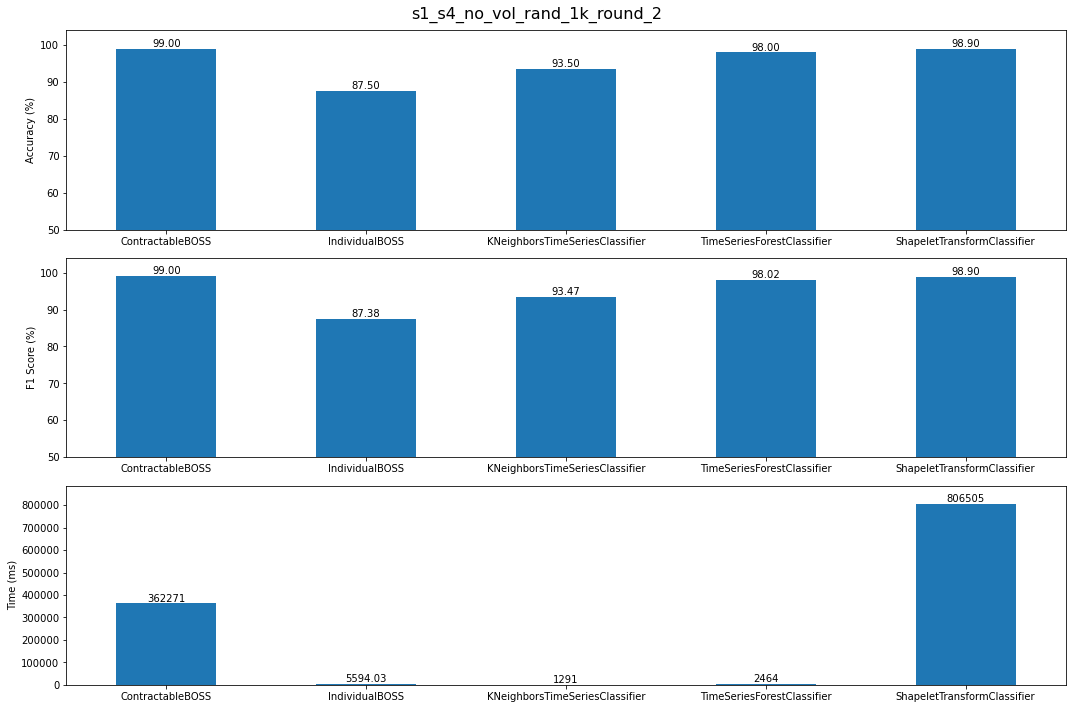

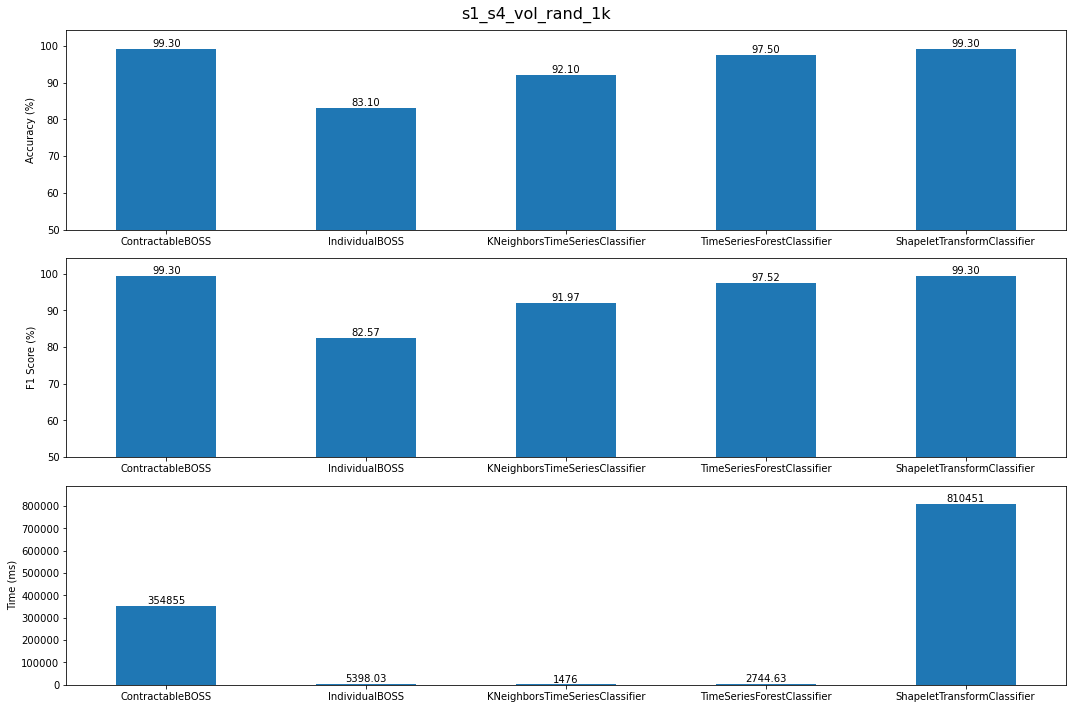

In [9]:
file_names = ["s1_s4_no_vol_rand_1k_round_2", "s1_s4_vol_rand_1k"]

for file_name in file_names: 
    df = getDataframeFromTable(getTableFromFile("../results/"+file_name+".txt"))
    createGraphs(df, title = file_name)